In [1]:
from brian2 import *
%matplotlib inline

In [2]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(30, 12))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=1)
    plot(ones(Nt), arange(Nt), 'ok', ms=1)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

Text(0.5, 0.98, 'p = 0.02')

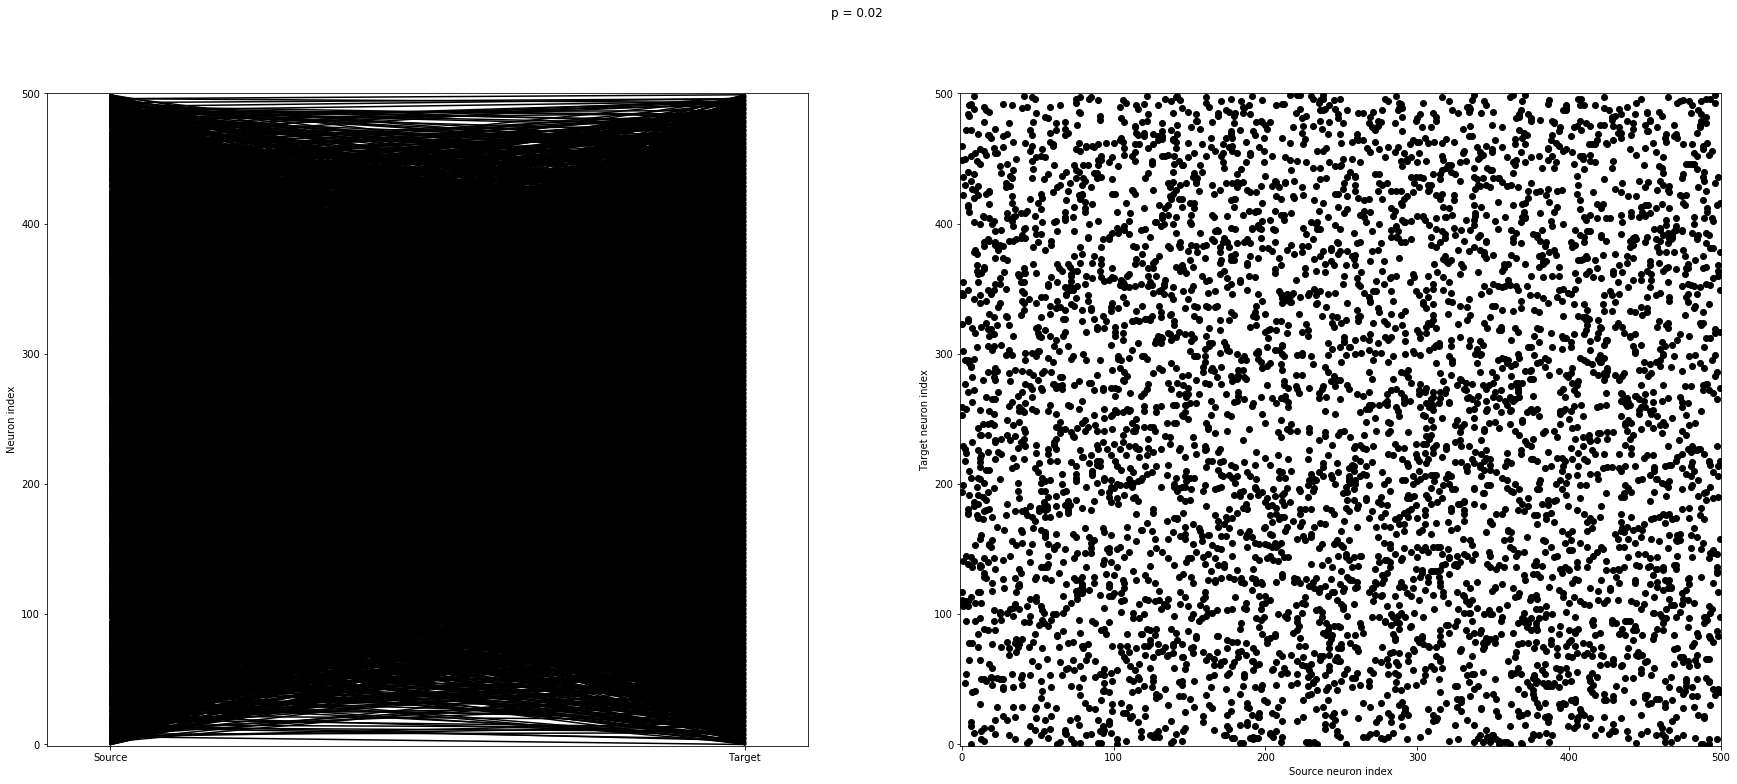

In [4]:
start_scope()
# Params
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/tau : 1
du/dt = a * (b*v - u)/tau : 1
'''

tau = 1*ms
I = 0
s = 10
a = 0.0275
b = 0.490

n = 10
N = 500

# P = PoissonGroup(n, rates=1/tau)
G = NeuronGroup(N, eqs, threshold='v>30', reset='v=u', 
                method='euler')
# S_P = Synapses(P, G, on_pre='v += s')
# S_P.connect()

S = Synapses(G, G)
P = n/N
S.connect(condition='i!=j', p=P)
assert(P == 0.02)

# S.delay = '2*ms'
S[:int(0.8 * N)].w = 'j * s'
S[int(0.8 * N):].w = '- j * s'
visualise_connectivity(S)
suptitle('p = '+str(P))

In [5]:
M = SpikeMonitor(G)

output_rates = []
store()
for i in range(0, 10):
    restore()
    run(1*second)
    output_rates.append(M.num_spikes/(N*second))

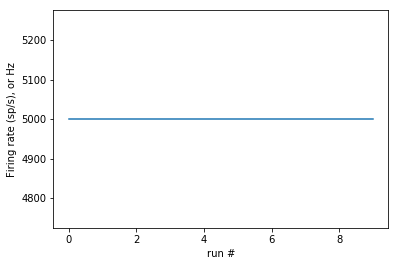

In [6]:
# print("firing rates: ", output_rates)
# plot(tau_range/ms, output_rates)
# xlabel(r'$\tau$ (ms)')
plot(output_rates)
xlabel('run #')
ylabel('Firing rate (sp/s), or Hz');